## Projeto Final - Big Data Science

Este notebook tem por objetivo a análise dos microdados do Enem 2021, tendo como foco a comparação do desempenho entre pessoas oriundas de escola pública e privada.

Autora: Karen Dantas C.


In [1]:

import pandas as pd
import seaborn as sns


<h3> Leitura dos dados </h3>

In [2]:

df = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=';', usecols=['TP_ST_CONCLUSAO','TP_ESCOLA','SG_UF_PROVA',
                                                               'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                                                               'NU_NOTA_MT','NU_NOTA_REDACAO','TP_FAIXA_ETARIA','TP_SEXO',
                                                               'TP_COR_RACA','TP_NACIONALIDADE'])
df.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,5,F,1,1,1,1,MG,NaN,574.6,472.6,NaN,760.0
1,12,M,1,1,1,1,AL,505.9,551.8,498.3,461.5,560.0
2,13,F,1,1,1,1,SP,NaN,NaN,NaN,NaN,NaN
3,3,M,3,1,2,2,CE,580.7,678.9,638.9,659.5,780.0
4,2,F,3,1,2,2,CE,497.7,532.4,457.6,582.6,780.0


In [3]:

df.count()


TP_FAIXA_ETARIA     3389832
TP_SEXO             3389832
TP_COR_RACA         3389832
TP_NACIONALIDADE    3389832
TP_ST_CONCLUSAO     3389832
TP_ESCOLA           3389832
SG_UF_PROVA         3389832
NU_NOTA_CN          2245844
NU_NOTA_CH          2378379
NU_NOTA_LC          2378379
NU_NOTA_MT          2245844
NU_NOTA_REDACAO     2378379
dtype: int64

<h3> Limpeza dos dados </h3>

In [4]:

df.isnull().sum()


TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ESCOLA                 0
SG_UF_PROVA               0
NU_NOTA_CN          1143988
NU_NOTA_CH          1011453
NU_NOTA_LC          1011453
NU_NOTA_MT          1143988
NU_NOTA_REDACAO     1011453
dtype: int64

In [5]:
#Deletar registros com valores nulos

df = df.dropna()
df.isnull().sum()
    

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ESCOLA           0
SG_UF_PROVA         0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
dtype: int64

In [6]:

df.count()


TP_FAIXA_ETARIA     2238107
TP_SEXO             2238107
TP_COR_RACA         2238107
TP_NACIONALIDADE    2238107
TP_ST_CONCLUSAO     2238107
TP_ESCOLA           2238107
SG_UF_PROVA         2238107
NU_NOTA_CN          2238107
NU_NOTA_CH          2238107
NU_NOTA_LC          2238107
NU_NOTA_MT          2238107
NU_NOTA_REDACAO     2238107
dtype: int64

In [7]:

df.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,12,M,1,1,1,1,AL,505.9,551.8,498.3,461.5,560.0
3,3,M,3,1,2,2,CE,580.7,678.9,638.9,659.5,780.0
4,2,F,3,1,2,2,CE,497.7,532.4,457.6,582.6,780.0
8,8,F,3,1,2,2,MG,487.4,476.5,450.7,493.4,520.0
9,4,F,3,1,2,2,BA,507.6,539.2,494.6,413.3,380.0


In [8]:
#Selecionar as pessoas que já concluíram o ensino médio, ou que estavam cursando o ensino médio e concluiriam em 2021

filtro_ensino_medio = ((df['TP_ST_CONCLUSAO'] == 1) | (df['TP_ST_CONCLUSAO'] == 2))

df = df[filtro_ensino_medio]


In [9]:

df.count()


TP_FAIXA_ETARIA     1864224
TP_SEXO             1864224
TP_COR_RACA         1864224
TP_NACIONALIDADE    1864224
TP_ST_CONCLUSAO     1864224
TP_ESCOLA           1864224
SG_UF_PROVA         1864224
NU_NOTA_CN          1864224
NU_NOTA_CH          1864224
NU_NOTA_LC          1864224
NU_NOTA_MT          1864224
NU_NOTA_REDACAO     1864224
dtype: int64

In [10]:
#Excluir as pessoas que não informaram se são de escola particular ou pública

filtro_escola = (df['TP_ESCOLA'] != 1)
dados = df[filtro_escola].copy()


In [11]:

dados.count()


TP_FAIXA_ETARIA     847397
TP_SEXO             847397
TP_COR_RACA         847397
TP_NACIONALIDADE    847397
TP_ST_CONCLUSAO     847397
TP_ESCOLA           847397
SG_UF_PROVA         847397
NU_NOTA_CN          847397
NU_NOTA_CH          847397
NU_NOTA_LC          847397
NU_NOTA_MT          847397
NU_NOTA_REDACAO     847397
dtype: int64

<h3> Análise - Estatística Descritiva </h3>

Em relação aos dados, estão sendo consideradas as pessoas que:
* Já concluíram o ensino médio, ou que estavam cursando o ensino médio e concluiriam em 2021;
* Informaram se cursaram o ensino médio em escola pública ou privada;
* Fizeram todas as provas do Enem 2021 (Linguagens, Códigos e suas tecnologias; Redação; Ciências Humanas e suas tecnologias; Ciências da Natureza e suas tecnologias; Matemática e suas tecnologias).

In [12]:

dados["TP_ESCOLA"] = dados["TP_ESCOLA"].map({ 2 : 'Pública', 3 : 'Privada'})


In [13]:

dados["TP_FAIXA_ETARIA"] = dados["TP_FAIXA_ETARIA"].map({ 1 : 'Menor de 17 anos', 2 : '17 anos', 3 : '18 anos', 
                                                         4 : '19 anos', 5 : '20 anos', 6 : '21 anos', 7 : '22 anos',
                                                        8 : '23 anos', 9 : '24 anos', 10 : '25 anos', 
                                                         11 : 'Entre 26 e 30 anos', 12 : 'Entre 31 e 35 anos',
                                                         13 : 'Entre 36 e 40 anos', 14 : 'Entre 41 e 45 anos',
                                                         15 : 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos',
                                                         17 : 'Entre 56 e 60 anos', 18 : 'Entre 61 e 65 anos',
                                                         19 : 'Entre 66 e 70 anos', 20 : 'Maior de 70 anos'})


In [14]:

dados["TP_SEXO"] = dados["TP_SEXO"].map({ 'F' : 'Feminino', 'M' : 'Masculino'}) 


In [15]:

dados["TP_COR_RACA"] = dados["TP_COR_RACA"].map({ 0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 
                                                 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}) 


In [16]:

dados["TP_NACIONALIDADE"] = dados["TP_NACIONALIDADE"].map({ 0 : 'Não informado', 1 : 'Brasileiro(a)', 
                                                           2 : 'Brasileiro(a) Naturalizado(a)', 3 : 'Estrangeiro(a)', 
                                                           4 : 'Brasileiro(a) Nato(a), nascido(a) no exterior'}) 


In [17]:

dados.head()


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,18 anos,Masculino,Parda,Brasileiro(a),2,Pública,CE,580.7,678.9,638.9,659.5,780.0
4,17 anos,Feminino,Parda,Brasileiro(a),2,Pública,CE,497.7,532.4,457.6,582.6,780.0
8,23 anos,Feminino,Parda,Brasileiro(a),2,Pública,MG,487.4,476.5,450.7,493.4,520.0
9,19 anos,Feminino,Parda,Brasileiro(a),2,Pública,BA,507.6,539.2,494.6,413.3,380.0
11,17 anos,Feminino,Branca,Brasileiro(a),2,Pública,RN,378.5,502.7,487.7,514.9,680.0


<h4> Análise das características gerais da amostra </h4>


Gráfico:


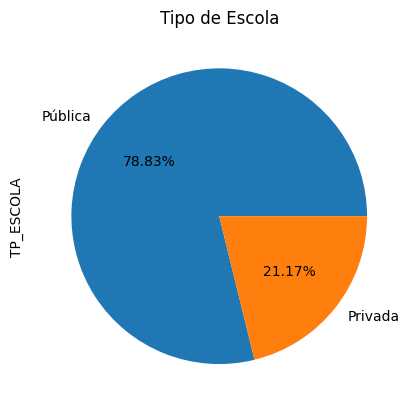

In [18]:

tipo_escola = dados['TP_ESCOLA'].value_counts(normalize=True)
tipo_escola.plot(kind='pie', autopct='%.2f%%', title='Tipo de Escola')
print("\nGráfico:")



Gráfico:


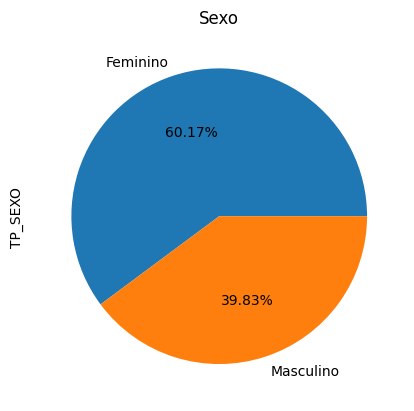

In [19]:

sexo_inscrito = dados['TP_SEXO'].value_counts(normalize=True)
sexo_inscrito.plot(kind='pie', autopct='%.2f%%', title='Sexo')
print("\nGráfico:")


In [20]:

cor_raca = round(dados['TP_COR_RACA'].value_counts(normalize=True)*100,2)
print('Cor/Raça         Frequência relativa(%):')
cor_raca 


Cor/Raça         Frequência relativa(%):


Branca           45.30
Parda            39.98
Preta            10.18
Não declarado     2.10
Amarela           1.97
Indígena          0.48
Name: TP_COR_RACA, dtype: float64


Gráfico:


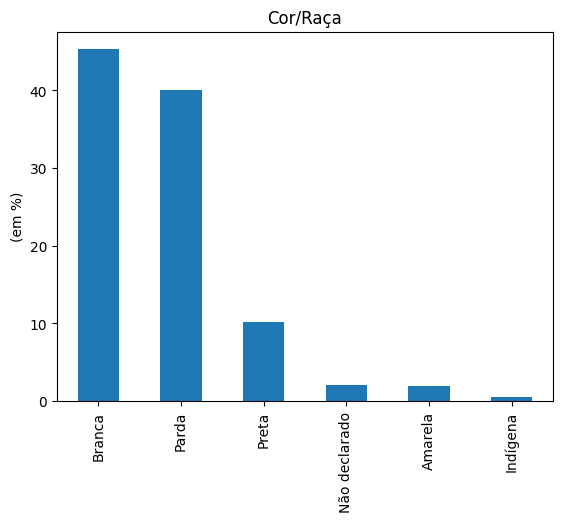

In [21]:

cor_raca.plot(kind='bar', title='Cor/Raça', ylabel='(em %)')
print("\nGráfico:")


In [22]:

uf_prova = round(dados['SG_UF_PROVA'].value_counts(normalize=True)*100,2)
print('UF    Frequência relativa(%):')
uf_prova


UF    Frequência relativa(%):


SP    17.35
MG     8.71
CE     8.29
BA     7.54
RJ     6.94
PE     5.39
PR     5.26
RS     4.54
GO     4.38
PA     3.91
MA     3.13
SC     3.04
AM     2.53
PB     2.45
ES     2.12
DF     2.07
PI     2.01
RN     1.94
MT     1.55
AL     1.41
MS     1.35
SE     1.34
TO     0.87
RO     0.83
AC     0.43
AP     0.43
RR     0.19
Name: SG_UF_PROVA, dtype: float64


Gráfico:


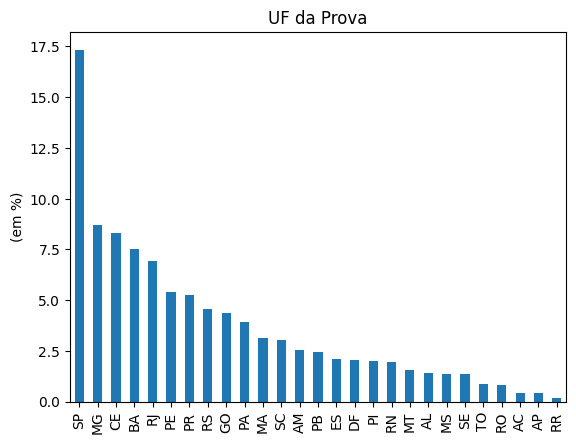

In [23]:

uf_prova.plot(kind='bar', title='UF da Prova', ylabel='(em %)')
print("\nGráfico:")


In [24]:

faixa_etaria = round(dados['TP_FAIXA_ETARIA'].value_counts(normalize=True)*100,3)
print('Faixa etária          Frequência relativa(%):')
faixa_etaria


Faixa etária          Frequência relativa(%):


17 anos               44.826
18 anos               42.479
19 anos                7.492
20 anos                2.100
Menor de 17 anos       1.186
21 anos                0.641
22 anos                0.265
Entre 26 e 30 anos     0.237
Entre 31 e 35 anos     0.147
23 anos                0.142
Entre 36 e 40 anos     0.110
24 anos                0.104
Entre 41 e 45 anos     0.076
25 anos                0.074
Entre 46 e 50 anos     0.056
Entre 51 e 55 anos     0.035
Entre 56 e 60 anos     0.019
Entre 61 e 65 anos     0.007
Entre 66 e 70 anos     0.002
Maior de 70 anos       0.001
Name: TP_FAIXA_ETARIA, dtype: float64

In [25]:

nacionalidade = round(dados['TP_NACIONALIDADE'].value_counts(normalize=True)*100,2)
print('Nacionalidade                                    Frequência relativa(%):')
nacionalidade


Nacionalidade                                    Frequência relativa(%):


Brasileiro(a)                                    97.55
Brasileiro(a) Naturalizado(a)                     1.97
Brasileiro(a) Nato(a), nascido(a) no exterior     0.24
Estrangeiro(a)                                    0.13
Não informado                                     0.11
Name: TP_NACIONALIDADE, dtype: float64

<h4> Análise geral das notas </h4>

In [26]:

notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']


In [27]:

dados[notas].describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,847397.0,484.17,77.90,0.0,424.9,474.3,536.7,848.7
NU_NOTA_CH,847397.0,513.07,90.80,0.0,441.9,513.1,579.4,846.9
NU_NOTA_LC,847397.0,498.15,76.14,0.0,444.8,500.7,552.2,820.5
NU_NOTA_MT,847397.0,529.69,107.63,0.0,441.9,509.1,605.7,953.1
NU_NOTA_REDACAO,847397.0,615.04,189.22,0.0,520.0,600.0,740.0,1000.0



Boxplot:



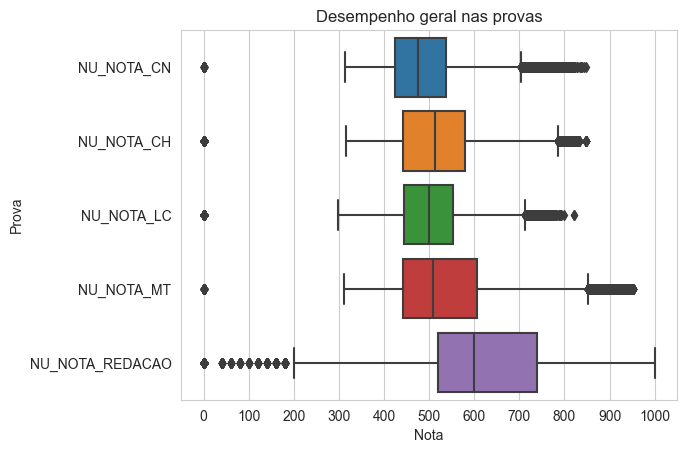

In [28]:

lista_ticks=list(range(0,1100,100))

sns.set_style("whitegrid")

grafico = sns.boxplot(data=dados[notas], orient='h')
grafico.set(xlabel='Nota', ylabel='Prova', title='Desempenho geral nas provas', xticks=lista_ticks)
print("\nBoxplot:\n")


<h4> Análise comparativa das notas considerando origem de escola pública ou privada </h4>

In [29]:

filtro_publica = (dados['TP_ESCOLA'] == 'Pública')
dados_publica = dados[filtro_publica].copy()


In [30]:

print("\nEscola pública:")
dados_publica[notas].describe().round(2).T



Escola pública:


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,668036.0,469.46,69.43,0.0,417.3,461.4,514.6,848.7
NU_NOTA_CH,668036.0,498.44,85.23,0.0,432.2,496.0,561.3,846.9
NU_NOTA_LC,668036.0,485.26,72.38,0.0,434.1,487.8,536.8,820.5
NU_NOTA_MT,668036.0,508.64,95.32,0.0,433.1,488.9,571.5,953.1
NU_NOTA_REDACAO,668036.0,583.28,185.20,0.0,500.0,580.0,680.0,1000.0


In [31]:

filtro_privada = (dados['TP_ESCOLA'] == 'Privada')
dados_privada = dados[filtro_privada].copy()


In [32]:

print("\nEscola privada:")
dados_privada[notas].describe().round(2).T



Escola privada:


,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,179361.0,538.99,83.08,0.0,477.2,542.5,598.9,844.5
NU_NOTA_CH,179361.0,567.55,90.16,0.0,510.5,577.3,630.3,846.9
NU_NOTA_LC,179361.0,546.16,70.41,0.0,502.2,551.8,595.4,799.3
NU_NOTA_MT,179361.0,608.09,114.45,0.0,519.5,615.6,691.5,953.1
NU_NOTA_REDACAO,179361.0,733.34,153.80,0.0,620.0,740.0,860.0,1000.0



Prova de Ciências da Natureza e suas tecnologias:



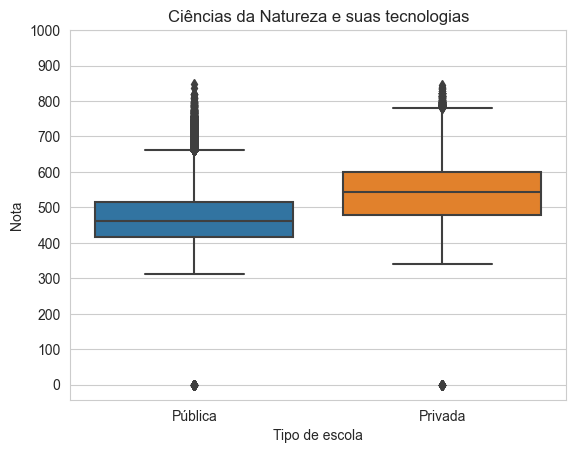

In [33]:

grafico = sns.boxplot(y="NU_NOTA_CN", x="TP_ESCOLA", data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota', title='Ciências da Natureza e suas tecnologias', yticks=lista_ticks)
print("\nProva de Ciências da Natureza e suas tecnologias:\n")



Prova de Ciências Humanas e suas tecnologias:



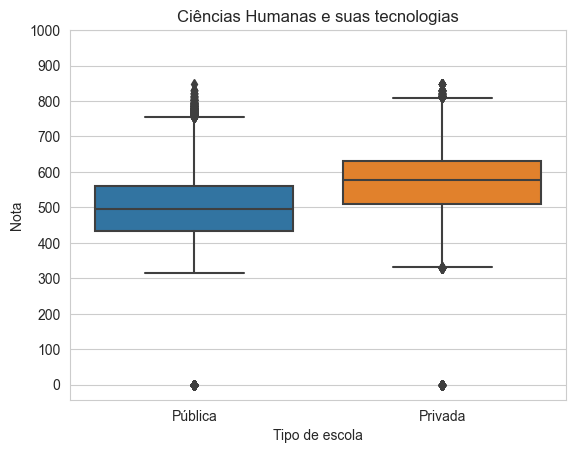

In [34]:

grafico = sns.boxplot(y="NU_NOTA_CH", x="TP_ESCOLA", data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota', title='Ciências Humanas e suas tecnologias', yticks=lista_ticks)
print("\nProva de Ciências Humanas e suas tecnologias:\n")



Prova de Linguagens, Códigos e suas tecnologias:



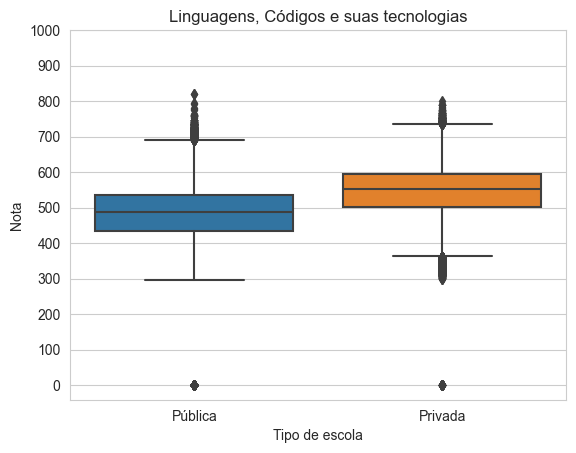

In [35]:

grafico = sns.boxplot(y="NU_NOTA_LC", x="TP_ESCOLA", data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota', title='Linguagens, Códigos e suas tecnologias', yticks=lista_ticks)
print("\nProva de Linguagens, Códigos e suas tecnologias:\n")



Prova de Matemática e suas tecnologias:



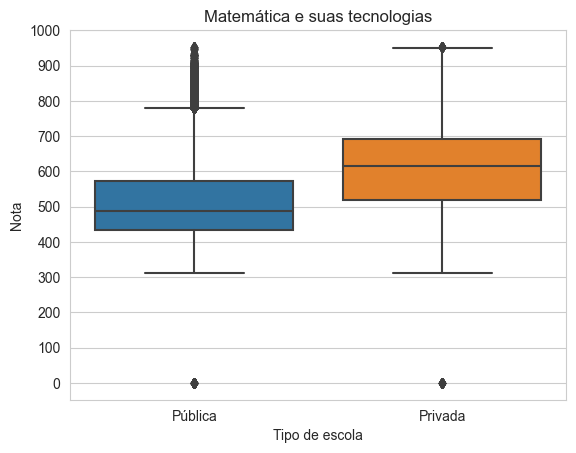

In [36]:

grafico = sns.boxplot(y="NU_NOTA_MT", x="TP_ESCOLA", data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota', title='Matemática e suas tecnologias', yticks=lista_ticks)
print("\nProva de Matemática e suas tecnologias:\n")



Prova de Redação:



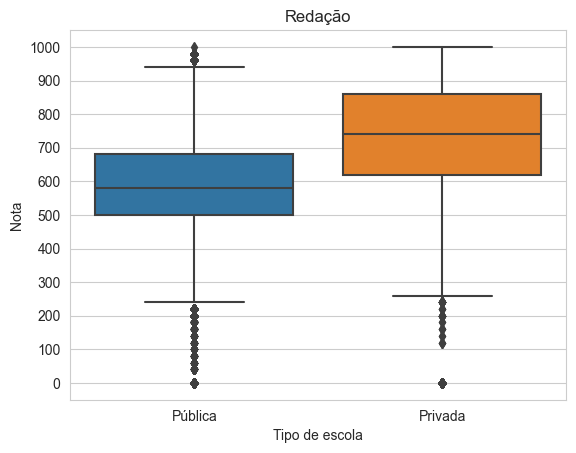

In [37]:

grafico = sns.boxplot(y="NU_NOTA_REDACAO", x="TP_ESCOLA", data=dados)
grafico.set(xlabel='Tipo de escola', ylabel='Nota', title='Redação', yticks=lista_ticks)
print("\nProva de Redação:\n")
